In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
train = pd.read_csv("./train.csv")
test = pd.read_csv("./test.csv")

In [3]:
train

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125


In [4]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [5]:
test

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,2915,160,RM,21.0,1936,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2006,WD,Normal
1455,2916,160,RM,21.0,1894,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,4,2006,WD,Abnorml
1456,2917,20,RL,160.0,20000,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,9,2006,WD,Abnorml
1457,2918,85,RL,62.0,10441,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,MnPrv,Shed,700,7,2006,WD,Normal


In [6]:
train.SalePrice.describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

Skewness :  1.8828757597682129


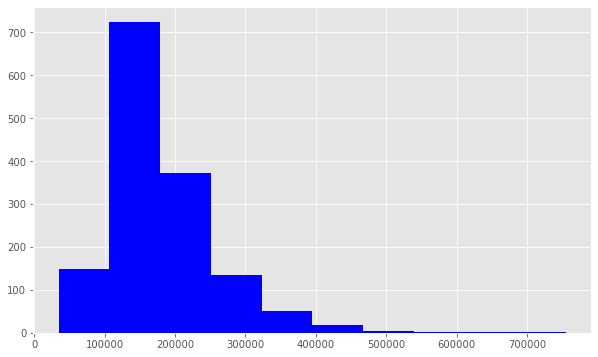

In [7]:
plt.style.use(style = "ggplot")
plt.rcParams['figure.figsize']=(10,6)
#check skewness of sale price 
print("Skewness : ", train.SalePrice.skew())
plt.hist(train.SalePrice, color='blue')
plt.show()

,index,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,178,179,20,RL,63.0,17423,Pave,NaN,IR1,Lvl,...,0,NaN,NaN,NaN,0,7,2009,New,Partial,501837
1,185,186,75,RM,90.0,22950,Pave,NaN,IR2,Lvl,...,0,NaN,GdPrv,NaN,0,6,2006,WD,Normal,475000
2,440,441,20,RL,105.0,15431,Pave,NaN,Reg,Lvl,...,0,NaN,NaN,NaN,0,4,2009,WD,Normal,555000
3,591,592,60,RL,97.0,13478,Pave,NaN,IR1,Lvl,...,0,NaN,NaN,NaN,0,6,2009,ConLI,Normal,451950
4,691,692,60,RL,104.0,21535,Pave,NaN,IR1,Lvl,...,0,NaN,NaN,NaN,0,1,2007,WD,Normal,755000
5,769,770,60,RL,47.0,53504,Pave,NaN,IR2,HLS,...,0,NaN,NaN,NaN,0,6,2010,WD,Normal,538000
6,798,799,60,RL,104.0,13518,Pave,NaN,Reg,Lvl,...,0,NaN,NaN,NaN,0,7,2009,New,Partial,485000
7,803,804,60,RL,107.0,13891,Pave,NaN,Reg,Lvl,...,0,NaN,NaN,NaN,0,1,2009,New,Partial,582933
8,898,899,20,RL,100.0,12919,Pave,NaN,IR1,Lvl,...,0,NaN,NaN,NaN,0,3,2010,New,Partial,611657
9,1046,1047,60,RL,85.0,16056,Pave,NaN,IR1,Lvl,...,0,NaN,NaN,NaN,0,7,2006,New,Partial,556581


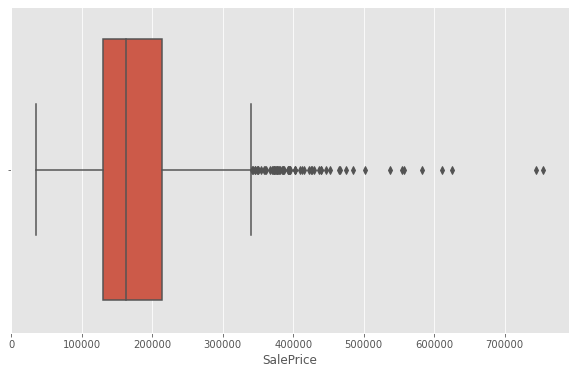

In [8]:
#outlier detection 
import seaborn as sns
sns.boxplot(x=train['SalePrice'])
train[train["SalePrice"]>450000].head(30).reset_index()

In [9]:
#treat outliers 
train['SalePrice'] = np.where(train['SalePrice']>450000 , 450000 ,train['SalePrice'])

Skewness after log:  0.011893191331651419


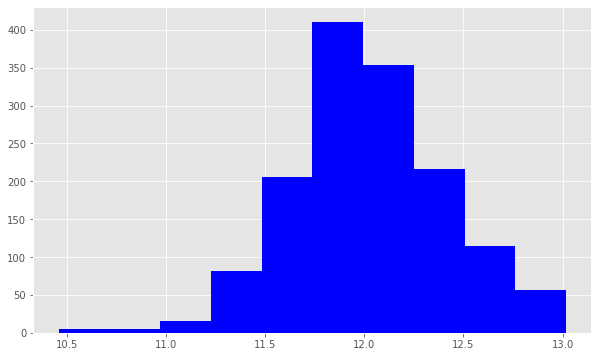

In [10]:
#change sale price to natural log 
print("Skewness after log: ", np.log(train.SalePrice).skew())
plt.hist(np.log(train.SalePrice), color='blue')
plt.show()
target= np.log(train.SalePrice)
#natural log transformation of target var changes it to normal distribution 

In [11]:
#find numeric features 
num_features = train.select_dtypes(include=[np.number])
#check data types of these 
num_features.dtypes

Id                 int64
MSSubClass         int64
LotFrontage      float64
LotArea            int64
OverallQual        int64
OverallCond        int64
YearBuilt          int64
YearRemodAdd       int64
MasVnrArea       float64
BsmtFinSF1         int64
BsmtFinSF2         int64
BsmtUnfSF          int64
TotalBsmtSF        int64
1stFlrSF           int64
2ndFlrSF           int64
LowQualFinSF       int64
GrLivArea          int64
BsmtFullBath       int64
BsmtHalfBath       int64
FullBath           int64
HalfBath           int64
BedroomAbvGr       int64
KitchenAbvGr       int64
TotRmsAbvGrd       int64
Fireplaces         int64
GarageYrBlt      float64
GarageCars         int64
GarageArea         int64
WoodDeckSF         int64
OpenPorchSF        int64
EnclosedPorch      int64
3SsnPorch          int64
ScreenPorch        int64
PoolArea           int64
MiscVal            int64
MoSold             int64
YrSold             int64
SalePrice          int64
dtype: object

In [12]:
corr = num_features.corr()
#top 5 highly correlated vars 
print(corr['SalePrice'].sort_values(ascending=False)[:5],'\n')
#bottom 5 highly correlated vars 
print(corr['SalePrice'].sort_values(ascending=False)[-5:],'\n')

SalePrice      1.000000
OverallQual    0.808384
GrLivArea      0.703381
GarageCars     0.659752
GarageArea     0.641172
Name: SalePrice, dtype: float64 

YrSold          -0.029763
OverallCond     -0.079147
MSSubClass      -0.087913
EnclosedPorch   -0.132072
KitchenAbvGr    -0.141945
Name: SalePrice, dtype: float64 



In [13]:
#check unique values of feature OverallQual
train.OverallQual.unique()

array([ 7,  6,  8,  5,  9,  4, 10,  3,  1,  2], dtype=int64)

In [14]:
#check first overall quality variable with SalePirce
qual_pivot = train.pivot_table(index='OverallQual', 
                               values='SalePrice', 
                               aggfunc=np.mean)
qual_pivot

,SalePrice
OverallQual,
1,50150.000000
2,51770.333333
3,87473.750000
4,108420.655172
5,133523.347607
6,161603.034759
7,207716.423197
8,274211.726190
9,356164.000000


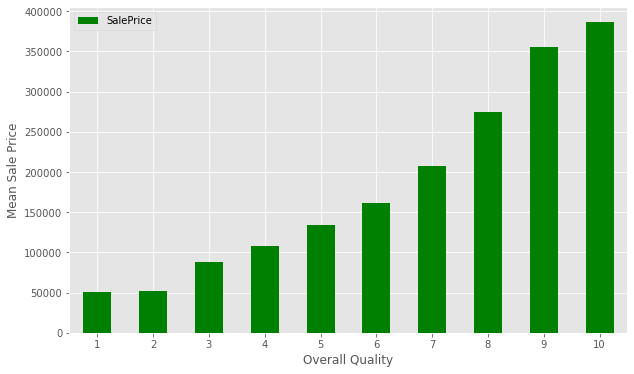

In [15]:
#create pivot for overall quality 
qual_pivot.plot(kind='bar', color='green')
plt.xlabel('Overall Quality')
plt.ylabel('Mean Sale Price')
plt.xticks(rotation=0)
plt.show()

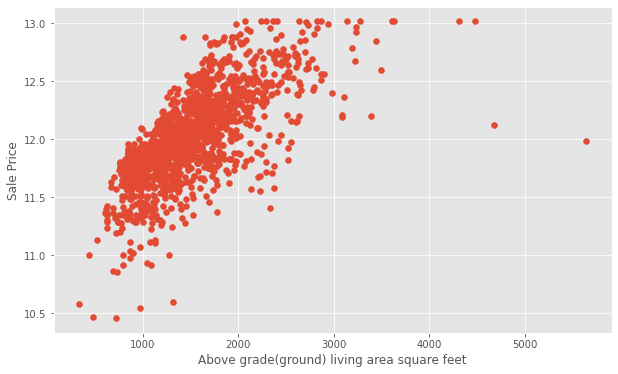

In [16]:
#create pivot for Gr Living area 
plt.scatter(x=train['GrLivArea'], y=target)
plt.ylabel('Sale Price')
plt.xlabel('Above grade(ground) living area square feet')
plt.show()

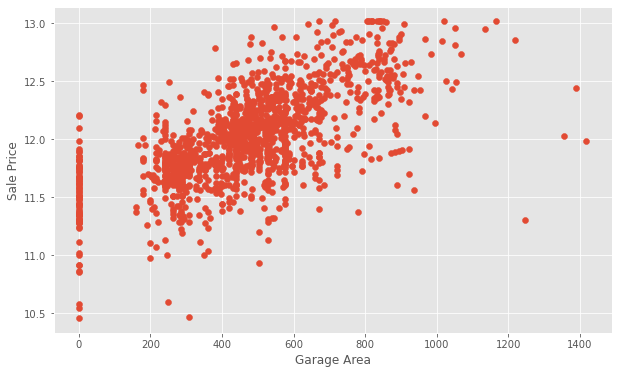

In [17]:
plt.scatter(x=train['GarageArea'], y=target)
plt.ylabel('Sale Price')
plt.xlabel('Garage Area')
plt.show()

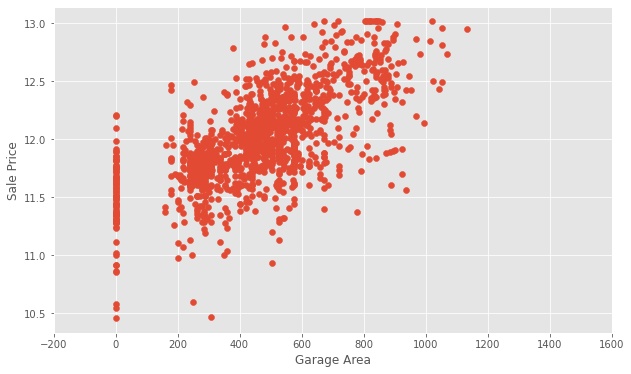

In [18]:
train = train[train['GarageArea'] < 1150]
plt.scatter(x=train['GarageArea'], y =np.log(train.SalePrice))
plt.xlim(-200,1600) #adjusting to same scale 
plt.ylabel('Sale Price')
plt.xlabel('Garage Area')
plt.show()

In [19]:
nuls = pd.DataFrame(train.isnull().sum().sort_values(ascending =False)[:25])
nuls.columns = ['Null Count']
nuls.index.name = 'Feature'
nuls

,Null Count
Feature,
PoolQC,1448
MiscFeature,1401
Alley,1363
Fence,1173
FireplaceQu,689
LotFrontage,258
GarageYrBlt,81
GarageCond,81
GarageType,81


In [20]:
print ("Unique values are:", train.MiscFeature.unique())

Unique values are: [nan 'Shed' 'Gar2' 'Othr' 'TenC']


In [21]:
catgr  = train.select_dtypes(exclude=[np.number])
catgr.describe()

,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,...,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition
count,1454,1454,91,1454,1454,1454,1454,1454,1454,1454,...,1373,1373,1373,1373,1454,6,281,53,1454,1454
unique,5,2,2,4,4,2,5,3,25,9,...,6,3,5,5,3,3,4,4,9,6
top,RL,Pave,Grvl,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,...,Attchd,Unf,TA,TA,Y,Ex,MnPrv,Shed,WD,Normal
freq,1146,1449,50,921,1308,1453,1048,1377,225,1256,...,866,605,1305,1320,1334,2,157,48,1266,1196


In [22]:
print('originals')
print(train.Street.value_counts(),"\n")

originals
Pave    1449
Grvl       5
Name: Street, dtype: int64 



In [23]:
train['enc_street'] = pd.get_dummies(train.Street, drop_first=True)
test['enc_street'] = pd.get_dummies(train.Street, drop_first=True)

<ipython-input-23-f2be5edf3053>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train['enc_street'] = pd.get_dummies(train.Street, drop_first=True)


In [24]:
print("Encoded:")
print(train.enc_street.value_counts())

Encoded:
1    1449
0       5
Name: enc_street, dtype: int64


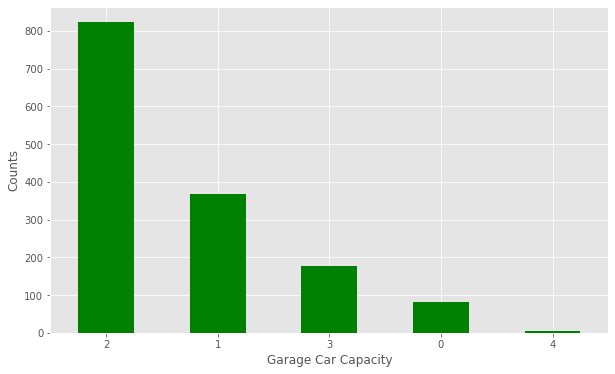

In [25]:
# One more variable, Garage car capacity
train.GarageCars.value_counts().plot(kind='bar', color='green')
plt.xlabel('Garage Car Capacity')
plt.ylabel('Counts')
plt.xticks(rotation=0)
plt.show()

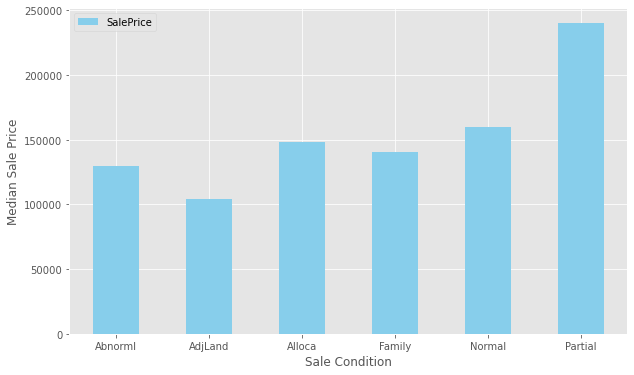

<ipython-input-26-150037ca70c8>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train['enc_condition'] = train.SaleCondition.apply(encode_condition)


In [26]:
condition_pivot = train.pivot_table(index='SaleCondition', values='SalePrice', aggfunc=np.median)
condition_pivot.plot(kind='bar', color='skyblue')
plt.xlabel('Sale Condition')
plt.ylabel('Median Sale Price')
plt.xticks(rotation=0)
plt.show()
#encoding steps
def encode_condition(x) : 
    return 1 if x =='Partial' else 0
train['enc_condition'] = train.SaleCondition.apply(encode_condition)
test['enc_condition'] = test.SaleCondition.apply(encode_condition)

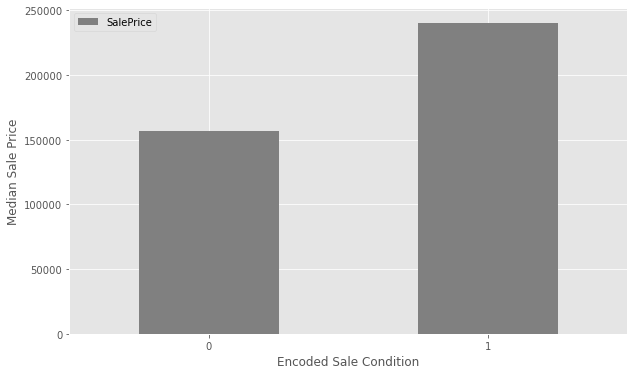

In [27]:
condition_pivot = train.pivot_table(index='enc_condition', values='SalePrice', aggfunc=np.median)
condition_pivot.plot(kind='bar', color='gray')
plt.xlabel('Encoded Sale Condition')
plt.ylabel('Median Sale Price')
plt.xticks(rotation=0)
plt.show()

In [28]:
#update missing values 
train = train.fillna(train.mean())
test = test.fillna(test.mean())

In [29]:
#interpolate missing values 
dt = train.select_dtypes(include=[np.number]).interpolate().dropna()
#check if all cols have zero null values 
sum(dt.isnull().sum()!=0)

0

In [30]:
#change y to natural log 
y = np.log(train.SalePrice)
#drop original dependent var and id 
X = dt.drop(['Id','SalePrice'], axis=1)

In [31]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=.33)

In [32]:
from sklearn import linear_model
lr = linear_model.LinearRegression()
model = lr.fit(X_train, y_train)
#r square 
print("R-Square : " ,model.score(X_test,y_test))
#rmse 
preds = model.predict(X_test)
from sklearn.metrics import mean_squared_error
print ('RMSE: ', mean_squared_error(y_test, preds))

R-Square :  0.8980348780394277
RMSE:  0.01703063666107097


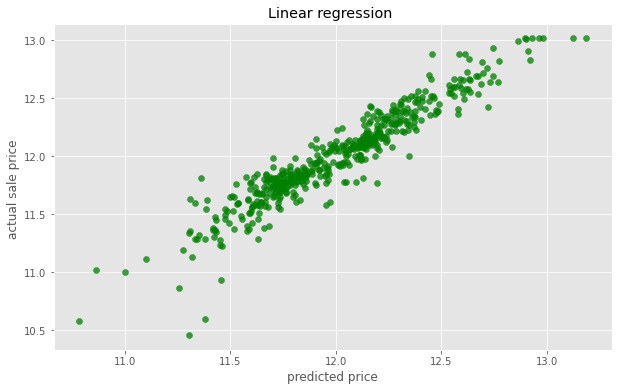

In [33]:
plt.scatter(preds, y_test, alpha=.75, color='g')
plt.xlabel('predicted price')
plt.ylabel('actual sale price ')
plt.title('Linear regression ')
plt.show()

<ipython-input-34-38712c033885>:13: MatplotlibDeprecationWarning: The 's' parameter of annotate() has been renamed 'text' since Matplotlib 3.3; support for the old name will be dropped two minor releases later.
  plt.annotate(s=overlay,xy=(12.1,10.6),size='x-large')


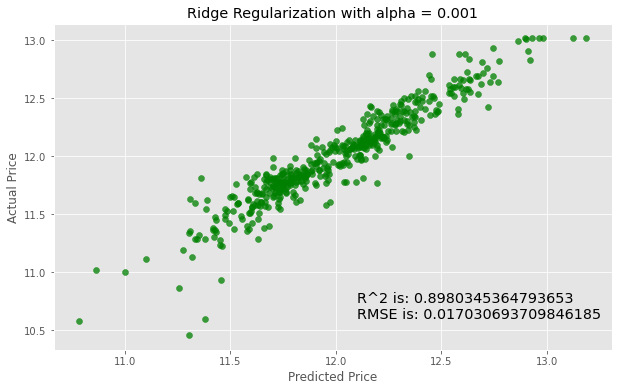

<ipython-input-34-38712c033885>:13: MatplotlibDeprecationWarning: The 's' parameter of annotate() has been renamed 'text' since Matplotlib 3.3; support for the old name will be dropped two minor releases later.
  plt.annotate(s=overlay,xy=(12.1,10.6),size='x-large')


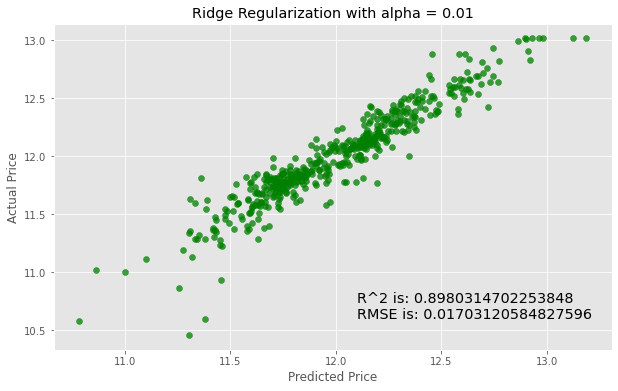

<ipython-input-34-38712c033885>:13: MatplotlibDeprecationWarning: The 's' parameter of annotate() has been renamed 'text' since Matplotlib 3.3; support for the old name will be dropped two minor releases later.
  plt.annotate(s=overlay,xy=(12.1,10.6),size='x-large')


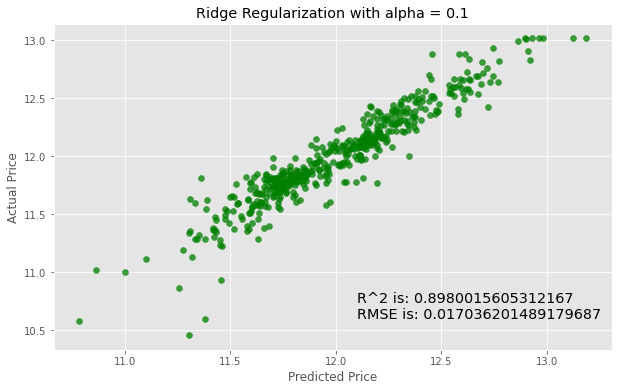

<ipython-input-34-38712c033885>:13: MatplotlibDeprecationWarning: The 's' parameter of annotate() has been renamed 'text' since Matplotlib 3.3; support for the old name will be dropped two minor releases later.
  plt.annotate(s=overlay,xy=(12.1,10.6),size='x-large')


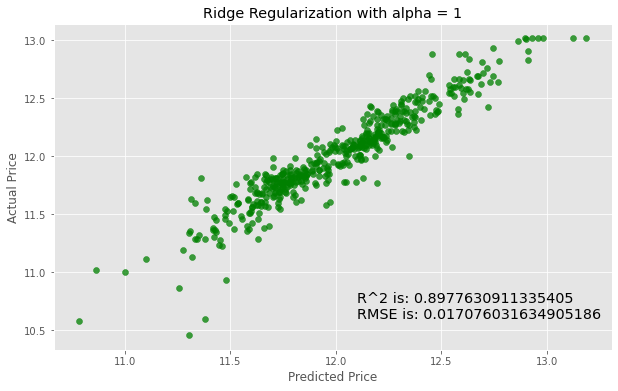

<ipython-input-34-38712c033885>:13: MatplotlibDeprecationWarning: The 's' parameter of annotate() has been renamed 'text' since Matplotlib 3.3; support for the old name will be dropped two minor releases later.
  plt.annotate(s=overlay,xy=(12.1,10.6),size='x-large')


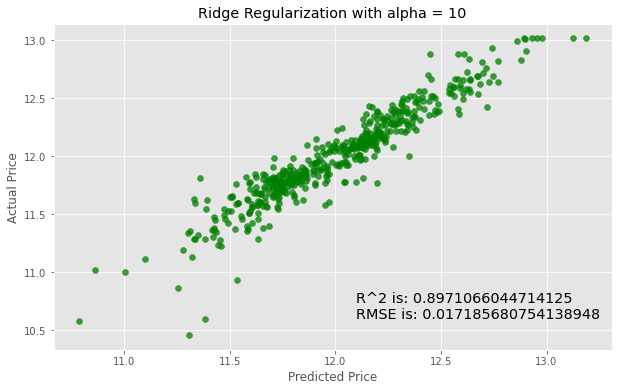

<ipython-input-34-38712c033885>:13: MatplotlibDeprecationWarning: The 's' parameter of annotate() has been renamed 'text' since Matplotlib 3.3; support for the old name will be dropped two minor releases later.
  plt.annotate(s=overlay,xy=(12.1,10.6),size='x-large')


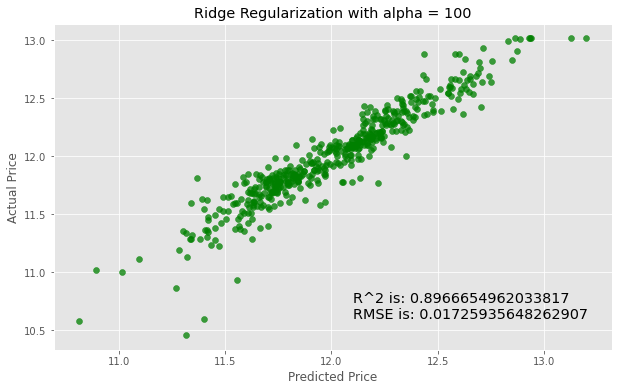

In [34]:
#Regularization 
for i in range (-3, 3):
    alpha = 10**i
    rm = linear_model.Ridge(alpha=alpha)
    ridge_model = rm.fit(X_train, y_train)
    preds_ridge = ridge_model.predict(X_test)
    plt.scatter(preds_ridge, y_test, alpha=.75, color='g')
    plt.xlabel('Predicted Price')
    plt.ylabel('Actual Price')
    plt.title('Ridge Regularization with alpha = {}'.format(alpha))
    overlay = 'R^2 is: {}\nRMSE is: {}'.format(ridge_model.score(X_test, y_test),
                                               mean_squared_error(y_test, preds_ridge))
    plt.annotate(s=overlay,xy=(12.1,10.6),size='x-large')
    plt.show()

In [36]:
submit= pd.DataFrame()
submit['Id'] = test.Id
#select features 
test_features = test.select_dtypes(include=[np.number]).drop(['Id'], axis=1).interpolate()
preds = model.predict(test_features)
#unlog/exp the prediction  
final_preds = np.exp(preds)
print('Original preds :\n', preds[:5])
print('Final preds :\n', final_preds[:5])
submit['SalePrice'] = final_preds
#final submission  
submit.to_csv('./test_submit.csv', index=False)

Original preds :
 [11.72560204 11.8898935  12.05926312 12.19097489 12.08556424]
Final preds :
 [123698.45144718 145785.77094064 172691.68632502 197003.12915898
 177293.9267724 ]


In [37]:
#variables not used 
print("Vars not used : \n", set(test.columns.values)-set(X.columns.values))

Vars not used : 
 {'LotConfig', 'Id', 'Heating', 'RoofStyle', 'LandContour', 'ExterCond', 'PavedDrive', 'FireplaceQu', 'BsmtCond', 'BsmtFinType1', 'Condition1', 'Exterior2nd', 'Street', 'Functional', 'GarageQual', 'RoofMatl', 'Fence', 'HouseStyle', 'HeatingQC', 'PoolQC', 'KitchenQual', 'SaleType', 'MiscFeature', 'CentralAir', 'BsmtExposure', 'GarageCond', 'LotShape', 'LandSlope', 'Exterior1st', 'Utilities', 'Neighborhood', 'BldgType', 'Alley', 'Condition2', 'Foundation', 'BsmtQual', 'ExterQual', 'GarageType', 'MSZoning', 'MasVnrType', 'GarageFinish', 'BsmtFinType2', 'SaleCondition', 'Electrical'}
